# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [38]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [39]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | alesund
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | souillac
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | taiyuan
Processing Record 6 of Set 1 | ananindeua
Processing Record 7 of Set 1 | utrik
Processing Record 8 of Set 1 | lhokseumawe
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | vadso
Processing Record 11 of Set 1 | port-saint-louis-du-rhone
Processing Record 12 of Set 1 | luanshya
Processing Record 13 of Set 1 | necochea
Processing Record 14 of Set 1 | vila franca do campo
Processing Record 15 of Set 1 | whitehorse
Processing Record 16 of Set 1 | alice springs
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | mili
Processing Record 20 of Set 1 | polyarnyy
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 22 of Set 1 | isafjordur
Processin

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,egilsstadir,65.2653,-14.3948,5.95,70,75,2.06,IS,1715635396
1,victoria falls,-17.9235,25.8430,20.74,51,66,1.88,ZW,1715635397
2,port-aux-francais,-49.3500,70.2167,2.76,99,100,15.03,TF,1715635397
3,kingston,17.9970,-76.7936,31.76,70,20,11.83,JM,1715634727
4,ranau,5.9538,116.6641,21.39,98,18,0.31,MY,1715635397


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,egilsstadir,65.2653,-14.3948,5.95,70,75,2.06,IS,1715635396
1,victoria falls,-17.9235,25.8430,20.74,51,66,1.88,ZW,1715635397
2,port-aux-francais,-49.3500,70.2167,2.76,99,100,15.03,TF,1715635397
3,kingston,17.9970,-76.7936,31.76,70,20,11.83,JM,1715634727
4,ranau,5.9538,116.6641,21.39,98,18,0.31,MY,1715635397


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

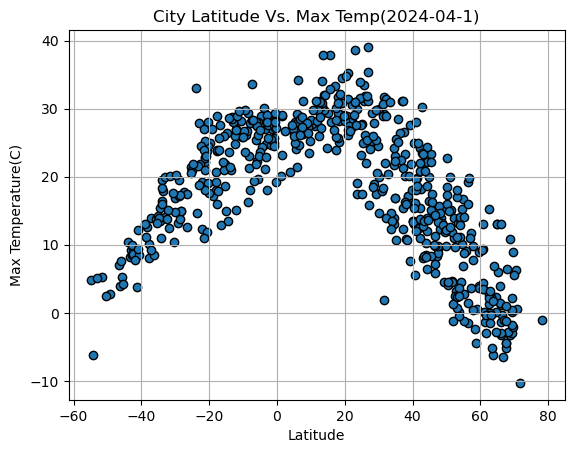

In [8]:
# Build scatter plot for latitude vs. temperature
x=city_data_df["Lat"]
y=city_data_df["Max Temp"]
plt.scatter(x,y,edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.title("City Latitude Vs. Max Temp(2024-04-1)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

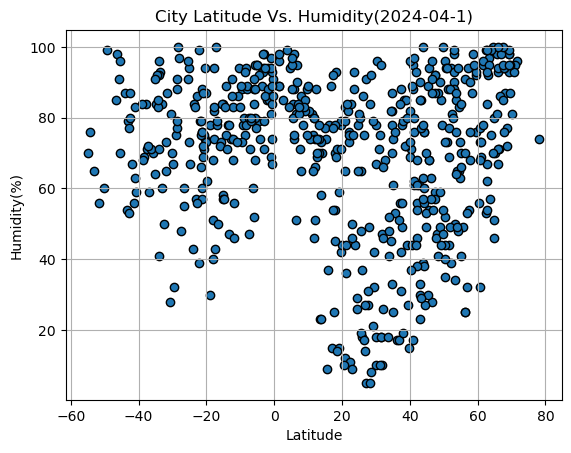

In [9]:
# Build the scatter plots for latitude vs. humidity
x=city_data_df["Lat"]
y=city_data_df["Humidity"]
plt.scatter(x,y,edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude Vs. Humidity(2024-04-1)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

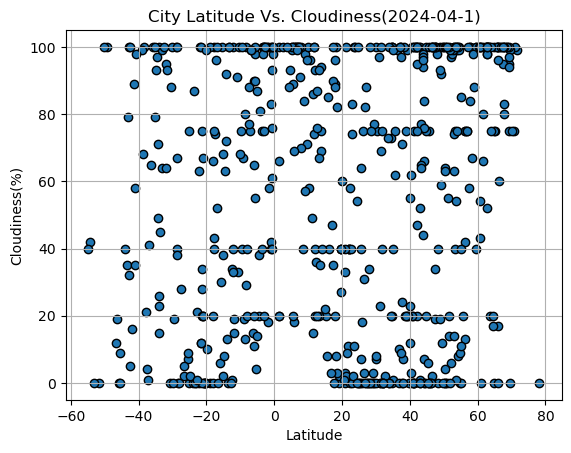

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x=city_data_df["Lat"]
y=city_data_df["Cloudiness"]
plt.scatter(x,y,edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude Vs. Cloudiness(2024-04-1)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

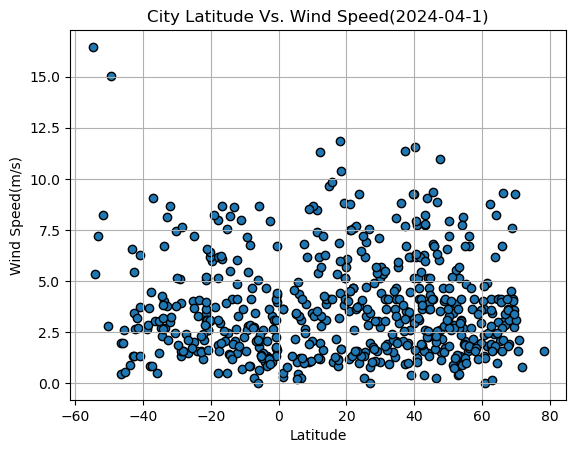

In [11]:
# Build the scatter plots for latitude vs. wind speed
x=city_data_df["Lat"]
y=city_data_df["Wind Speed"]
plt.scatter(x,y,edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.title("City Latitude Vs. Wind Speed(2024-04-1)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [41]:
# Define a function to create Linear Regression plots

import scipy.stats as st
def linear_regression(a,b):
    correlation = st.pearsonr(a, b)
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(a, b)
    regress_values = a * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(a, b)
    plt.plot(a,regress_values,"r-")
    plt.annotate(line_eq,(a.min(),b.min()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {correlation[0]**2}")
                 


In [42]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,egilsstadir,65.2653,-14.3948,5.95,70,75,2.06,IS,1715635396
3,kingston,17.9970,-76.7936,31.76,70,20,11.83,JM,1715634727
4,ranau,5.9538,116.6641,21.39,98,18,0.31,MY,1715635397
5,arteche,12.2645,125.4048,26.02,88,36,1.94,PH,1715635397
7,yellowknife,62.4560,-114.3525,15.23,53,100,8.75,CA,1715635398


In [43]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,victoria falls,-17.9235,25.8430,20.74,51,66,1.88,ZW,1715635397
2,port-aux-francais,-49.3500,70.2167,2.76,99,100,15.03,TF,1715635397
6,adamstown,-25.0660,-130.1015,20.98,73,0,2.02,PN,1715635398
10,atafu village,-8.5421,-172.5159,29.33,75,80,6.74,TK,1715635399
14,port alfred,-33.5906,26.8910,17.88,93,45,2.68,ZA,1715635400


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7137589060778216


<function matplotlib.pyplot.show(close=None, block=None)>

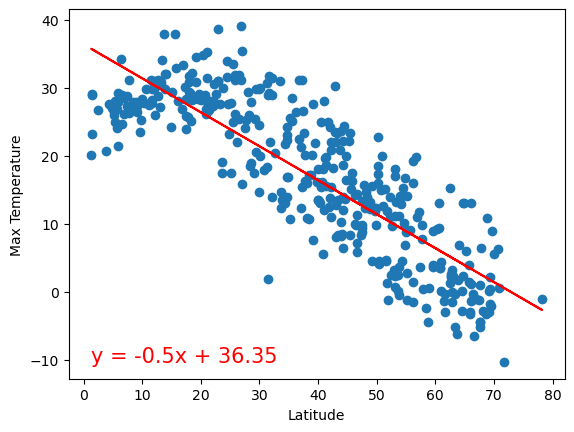

In [44]:
# Linear regression on Northern Hemisphere
a = northern_hemi_df["Lat"]
b = northern_hemi_df["Max Temp"]

linear_regression (a,b)
plt.ylabel ("Max Temperature")
plt.show


The r-squared is: 0.7092616022138026


<function matplotlib.pyplot.show(close=None, block=None)>

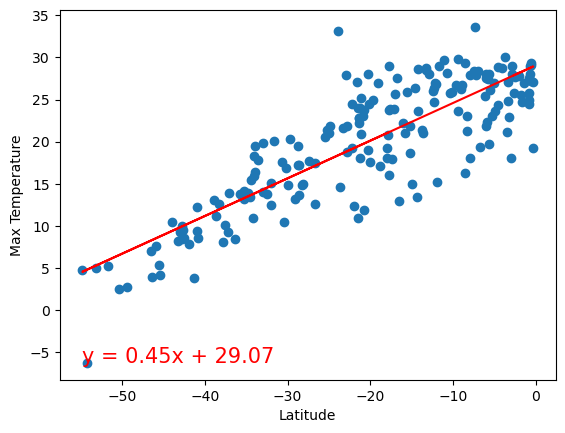

In [46]:
# Linear regression on Southern Hemisphere

a = southern_hemi_df["Lat"]
b = southern_hemi_df["Max Temp"]

linear_regression (a,b)
plt.ylabel ("Max Temperature")
plt.show


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.022156134705876022


<function matplotlib.pyplot.show(close=None, block=None)>

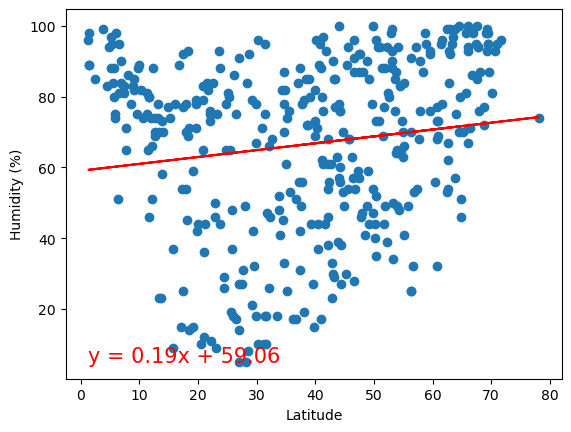

In [47]:
# Northern Hemisphere
a = northern_hemi_df["Lat"]
b = northern_hemi_df["Humidity"]

linear_regression (a,b)
plt.ylabel ("Humidity (%)")
plt.show

The r-value is: 0.0002808747046324607


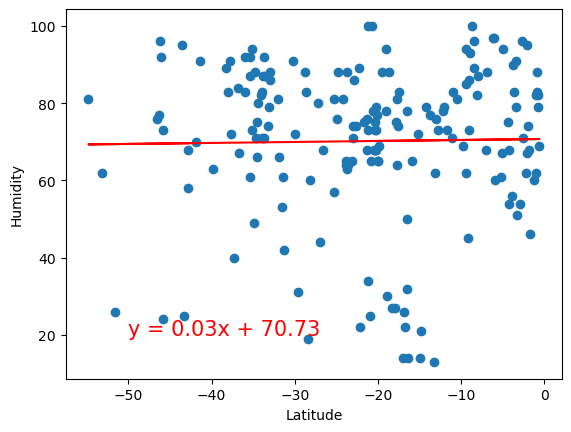

In [ ]:
# Southern Hemisphere
a = southern_hemi_df["Lat"]
b = southern_hemi_df["Humidity"]

linear_regression (a,b)
plt.ylabel ("Humidity (%)")
plt.show

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.01736939620027168


<function matplotlib.pyplot.show(close=None, block=None)>

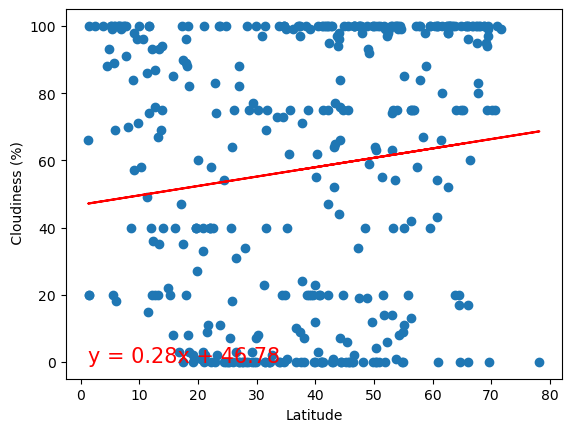

In [48]:
# Northern Hemisphere
a = northern_hemi_df["Lat"]
b = northern_hemi_df["Cloudiness"]

linear_regression (a,b)
plt.ylabel (" Cloudiness (%)")
plt.show

The r-squared is: 0.027726350933898154


<function matplotlib.pyplot.show(close=None, block=None)>

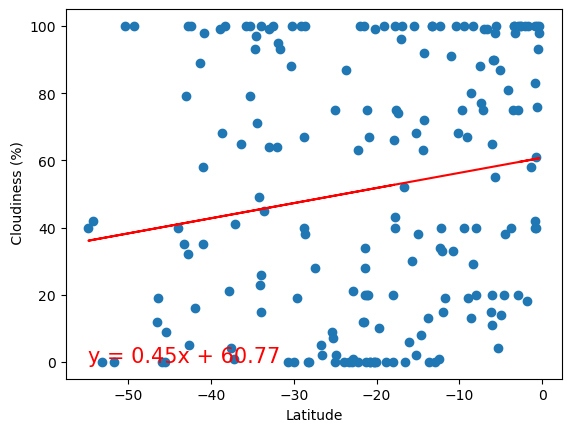

In [50]:
# Southern Hemisphere
a = southern_hemi_df["Lat"]
b = southern_hemi_df["Cloudiness"]

linear_regression (a,b)
plt.ylabel (" Cloudiness (%)")
plt.show

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0034834292931299436


<function matplotlib.pyplot.show(close=None, block=None)>

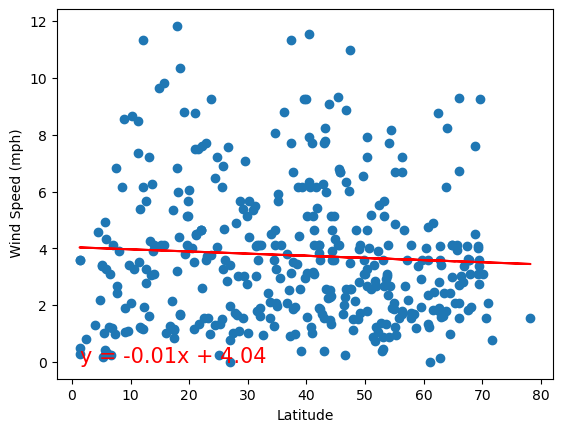

In [53]:
# Northern Hemisphere
a = northern_hemi_df["Lat"]
b = northern_hemi_df["Wind Speed"]

linear_regression (a,b)
plt.ylabel (" Wind Speed (mph)")
plt.show



The r-squared is: 0.04053057909206317


<function matplotlib.pyplot.show(close=None, block=None)>

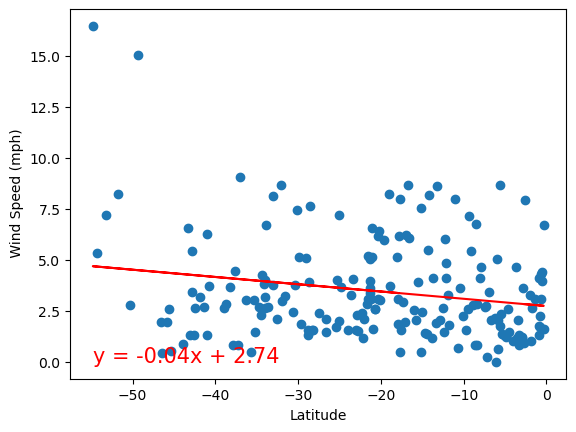

In [55]:
# Southern Hemisphere
a = southern_hemi_df["Lat"]
b = southern_hemi_df["Wind Speed"]

linear_regression (a,b)
plt.ylabel (" Wind Speed (mph)")
plt.show

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
Relationship between Temperature and Latitude: 
